# LAB 2 (var 1)
### Babushkin A.M. + Krokhin R.O.

In [3]:

import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm

## TASK 1

За границей:
[9.094663167547488, 9.038836665104144, 8.904672909677036, 11.440348088712534, 8.923362160993051, 8.936856718931196]
Сдвиги:
[0.1793221501778035, 0.08562861982150949, 0.024940213084093443, 0.9053368324525124, 0.03209884471092117, 0.9611633348958559, 0.8482585994171004, 0.21810895028775157, 0.2563516658107261, 0.6661953825536777]
Дисперсии:
[1.0258241344272951, 1.978757941042839, 2.933414645913985, 3.6974885716196537, 4.615176009069542, 5.33498741707918, 6.0574752420749585, 6.8728303581581125, 7.662246574391394, 8.603037343263573]
Среднеквадратичная ошибка:
[0.03215643354439071, 0.007332260532536608, 0.0006220142286799858, 0.8196347801951485, 0.001030335831775832, 0.9238349563481233, 0.7195426514850607, 0.04757151419562489, 0.06571617656393419, 0.443816287735841]


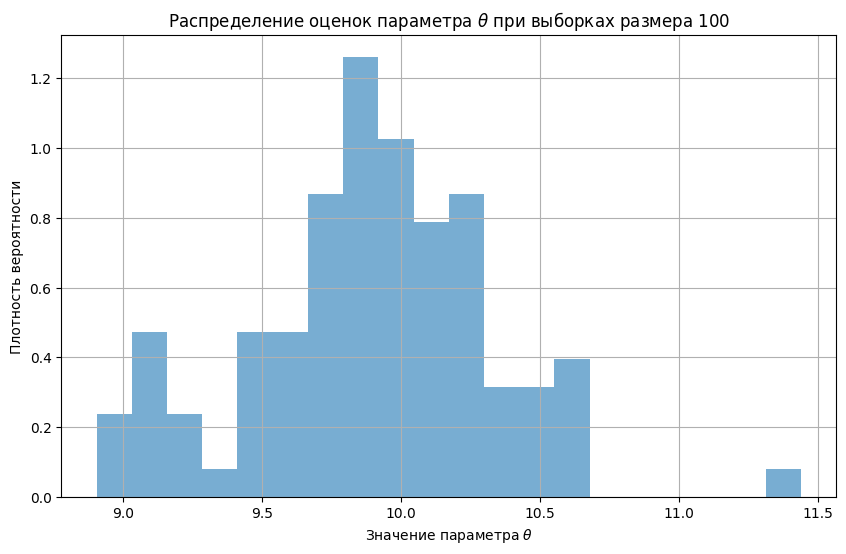

За границей:
[8.624917211678499, 9.045130668444843, 9.099820264715042, 11.120543522032659, 8.746641020553099, 11.153506802784884, 9.105823011615618]
Сдвиги:
[0.24922076778246627, 0.5058892857605635, 0.5435917711515472, 1.3750827883215013, 0.9548693315551571, 0.39467750264599566, 0.22871461228470658, 0.030333862846028126, 0.18194195022289605, 0.4761160910092812]
Дисперсии:
[0.5226064685750483, 0.9661783445546728, 1.4017259859784956, 1.7592199737168863, 2.1491401098251877, 2.6623256624043683, 3.1093514310418118, 3.5704215868235956, 4.046986263572076, 4.5473183356230615]
Среднеквадратичная ошибка:
[0.062110991094081976, 0.25592396944733303, 0.2954920136636761, 1.8908526747380348, 0.9117754403445925, 0.15577033109487992, 0.05231037387254365, 0.0009201432351616456, 0.03310287325091078, 0.22668653211795814]


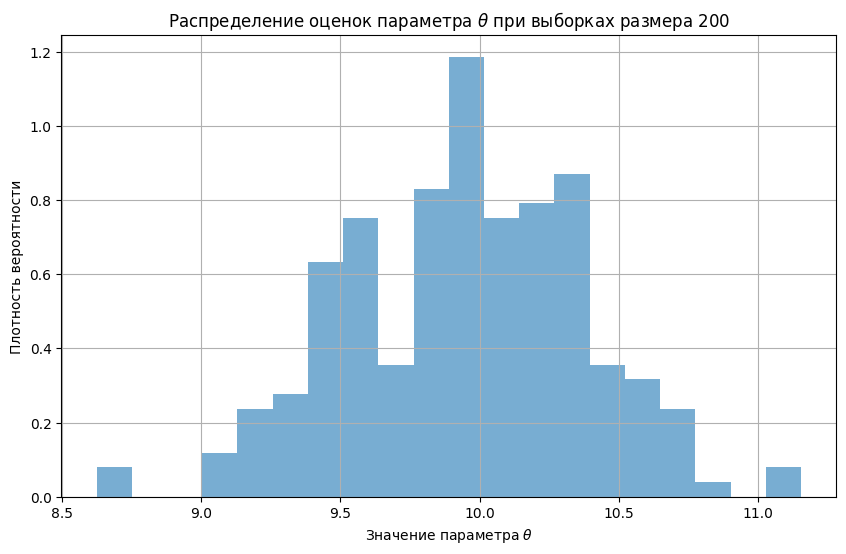

За границей:
[11.125528547140268, 9.065589853689552, 9.043532127086907, 10.883345526769764, 10.912651669615569, 9.050269848084818, 8.668064633735897, 9.096622597611516, 9.119508932695009, 8.992192714040314]
Сдвиги:
[0.35409906972307326, 0.08030175649128957, 0.8317549090466212, 0.4992917940561572, 0.4477678636004345, 1.1255285471402683, 0.030184208705236415, 0.038580644461511326, 0.3754154501115501, 0.20816815598537453]
Дисперсии:
[0.309110866913983, 0.6445293711683571, 1.0295672447562296, 1.3229909002113105, 1.6176242018544886, 2.0165746832766667, 2.3333381152659234, 2.6473499345631373, 2.9378429372296577, 3.2367302517264456]
Среднеквадратичная ошибка:
[0.1253861511787459, 0.006448372095586366, 0.6918162287231531, 0.2492922956118161, 0.20049605967329734, 1.2668145104276831, 0.0009110864551612698, 0.0014884661270655446, 0.14093676018245777, 0.04333398116635122]


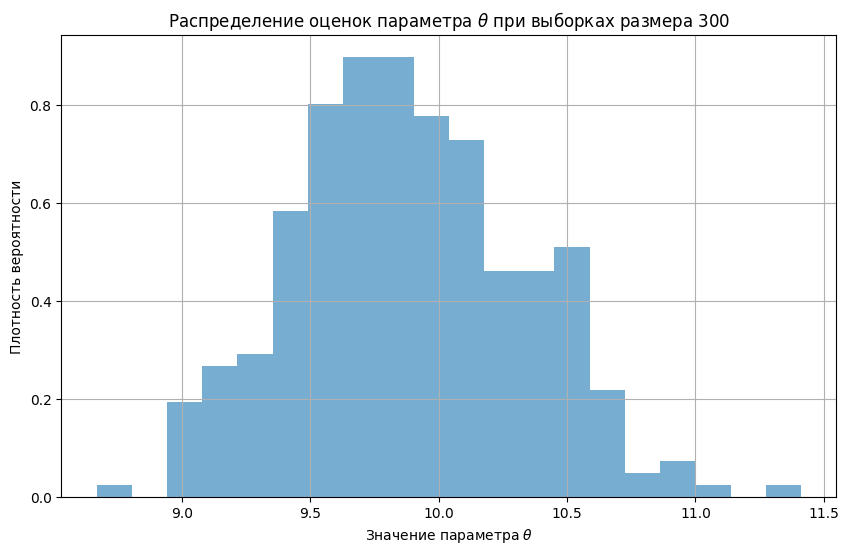

За границей:
[9.048912773143586, 10.955302803062374, 8.889014189504362, 9.103922265227562, 11.41280844918944, 8.92756704971053, 8.817357158977282, 8.867784129847584, 10.932982706447227, 10.951602635205896]
Сдвиги:
[0.7377482946163596, 0.9510872268564139, 0.32132872593438755, 0.9553028030623736, 0.6538354360316845, 0.2442884736039428, 0.3374312116002134, 0.37033646484179883, 0.4091883982609996, 0.060164287870902555]
Дисперсии:
[0.2875274758561006, 0.4905082023099294, 0.7217205598022123, 1.016982071472291, 1.2300908853158254, 1.4854257739444778, 1.7441595873553086, 2.0032279114014164, 2.222935189691037, 2.4580977318417307]
Среднеквадратичная ошибка:
[0.544272546209347, 0.9045669130894237, 0.10325215011061674, 0.9126034455388281, 0.427500777410743, 0.05967685833574425, 0.11385982256198798, 0.1371490971915209, 0.16743514527140244, 0.0036197415350128323]


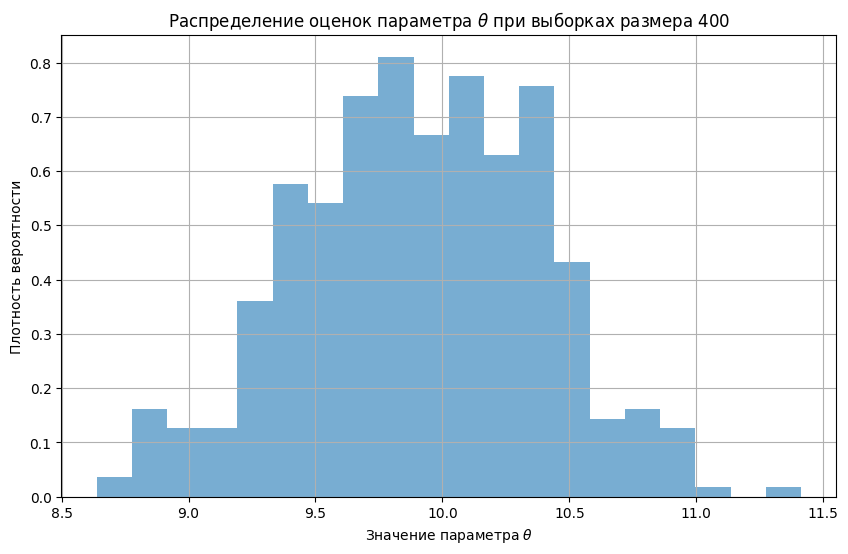

За границей:
[9.097212325119212, 10.911409960081834, 8.74826128399665, 8.81605485675556, 9.066386295519898, 10.996377694387585, 8.98174403421998, 9.057357808322646, 11.235891044481475, 9.047984505912126]
Сдвиги:
[0.14815578392085804, 0.17418906950888946, 0.4496919633522989, 0.017806526297251324, 0.44110162602694913, 0.35200808939700856, 0.5453832950914492, 0.01826114056075845, 0.9027876748807877, 0.06319545298156015]
Дисперсии:
[0.19372943357795266, 0.39954174732339043, 0.6158229603001164, 0.8122790399613066, 0.9915647609887634, 1.2013220517071936, 1.3751779338480425, 1.5684739398157113, 1.7278534095125142, 1.9178713727553585]
Среднеквадратичная ошибка:
[0.021950136309203977, 0.030341831936372726, 0.20222286190364533, 0.00031707237877470296, 0.1945706444836185, 0.12390969500093237, 0.2974429385648068, 0.00033346925457977737, 0.8150255859166589, 0.00399366527754458]


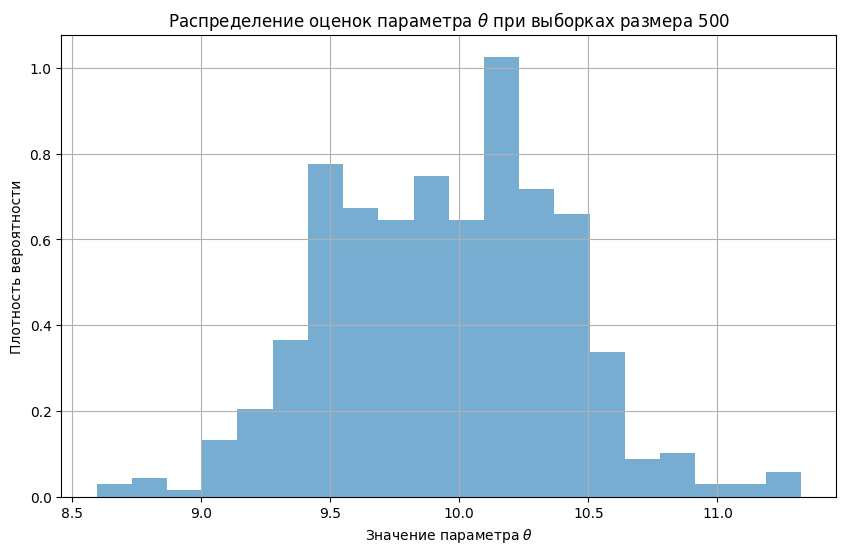

За границей:
[8.985730097746849, 8.829628405972848, 8.922768710514319, 9.09378866747052, 9.022636702854927, 9.000976324755367, 8.925925523989305, 10.887593754481863, 8.759709256537661, 8.808414312309832]
Сдвиги:
[0.8287669098733357, 0.06945787381637913, 0.27341240116492926, 0.20452795284457004, 0.2967459998748012, 0.5478014932775146, 0.11917766708411115, 0.1568828250344083, 0.4382681848076686, 0.14419353786667344]
Дисперсии:
[0.13995221755463097, 0.3081474854745227, 0.46452249867486645, 0.6225983763649988, 0.7967914417505618, 0.9428738020519235, 1.1021084465161632, 1.2698998059397182, 1.4466377747298322, 1.6128446541604295]
Среднеквадратичная ошибка:
[0.6868545909009977, 0.004824396235092046, 0.07475434111077221, 0.04183168349479067, 0.08805818844169552, 0.3000864760370749, 0.01420331633161123, 0.02461222079077677, 0.19207900181460877, 0.020791776362507786]


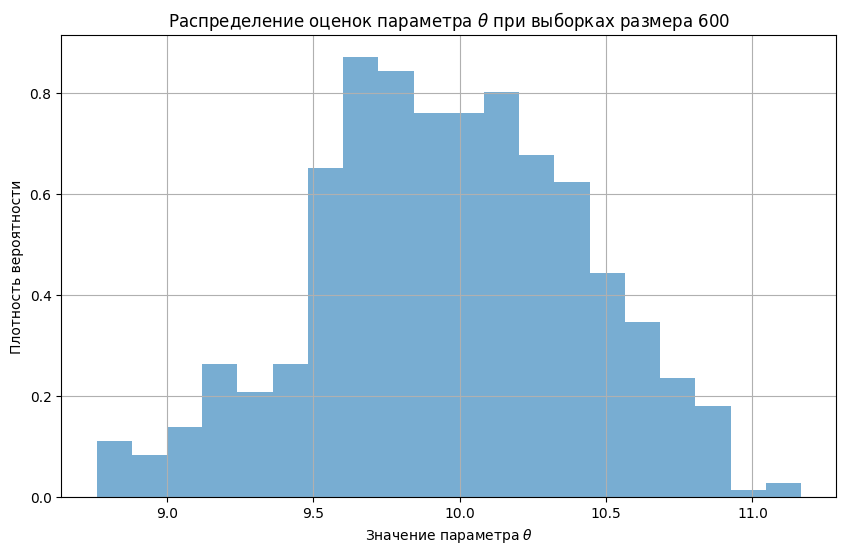

За границей:
[8.631227624634018, 8.899984569372192, 8.778631779479877, 8.614173732685082, 9.068703063016729, 9.044744234564195, 11.041181115172943, 8.9779107955911, 9.11403584406906, 11.361266310031716]
Сдвиги:
[0.3218436534453186, 1.3687723753659817, 0.47962556306091564, 0.8231580516405419, 0.08560749201308049, 0.1540554834180199, 0.28264546868988205, 0.12969516192036856, 0.299932379737351, 0.12118772231129249]
Дисперсии:
[0.1519832225059437, 0.2578933954882008, 0.38645411465891943, 0.5055220588453886, 0.6490781066268453, 0.785451338918285, 0.9338657030018354, 1.0701084235895924, 1.2012548757039754, 1.3369458071140927]
Среднеквадратичная ошибка:
[0.10358333726303036, 1.873537815565032, 0.23004068074150036, 0.677589177980653, 0.007328642688769639, 0.0237330919711598, 0.0798884609709231, 0.01682083502555062, 0.08995943241491051, 0.01468646403899894]


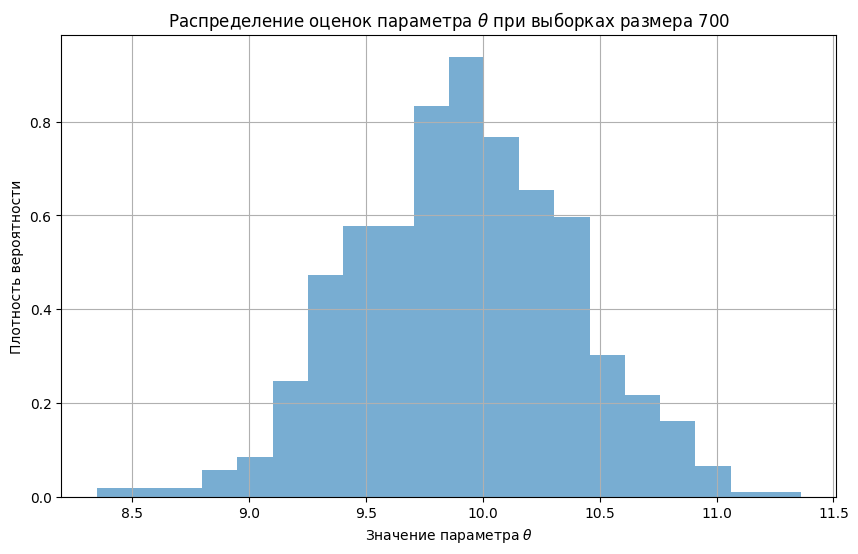

За границей:
[8.458223123411491, 9.093971679207144, 11.022193039315818, 9.04438550564554, 9.113060619183873, 8.890824016546, 9.05466419670054, 9.07184134954843, 8.289027654566196, 10.92601400318628]
Сдвиги:
[0.11383439003498275, 0.11725977608889337, 0.1770932500065978, 0.1109530665966556, 0.639850445977876, 0.25630733888544377, 0.3134596922598565, 0.6230071868629636, 0.7127897154020122, 0.31303306693004807]
Дисперсии:
[0.12770223001433492, 0.24932296457125125, 0.3779917057890497, 0.49914800034572643, 0.6391470706658832, 0.7688474427901006, 0.8996758794428302, 1.038193885811687, 1.1787277480382665, 1.3085252805128005]
Среднеквадратичная ошибка:
[0.012958268354636579, 0.01374985508841741, 0.031362019197899355, 0.012310582987201894, 0.4094085932180868, 0.06569345196653771, 0.09825697867164393, 0.3881379548829037, 0.5080691783828816, 0.09798970099163196]


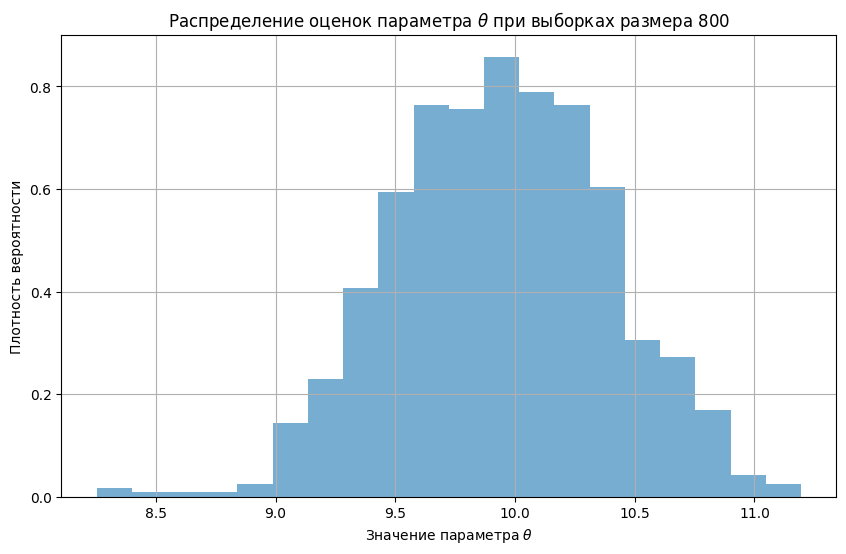

За границей:
[8.872838700352625, 11.061521227749692, 8.985674321197829, 11.052569901234643, 8.769095245722587, 10.937059462729177, 8.984603834049366, 9.090103246023428, 8.706244086962796, 9.056512059289199]
Сдвиги:
[0.2590845114752227, 0.2933427185555679, 0.281545370389237, 0.025621441935676614, 0.2466189492526194, 0.18455137676875388, 0.04979408052844647, 0.6473404026557859, 0.22633733534203593, 0.1247965469887724]
Дисперсии:
[0.10531111810440637, 0.20964933214068765, 0.31400868433993784, 0.42371003080087605, 0.528348261294058, 0.6422407679769079, 0.7528704918325622, 0.8483575058631403, 0.9524839498604671, 1.0585667867483064]
Среднеквадратичная ошибка:
[0.0671247840863548, 0.08604995052957114, 0.07926779558761264, 0.0006564582868632482, 0.06082090613046606, 0.03405921066724255, 0.002479450455673412, 0.41904959691055493, 0.05122858936973323, 0.01557417814032088]


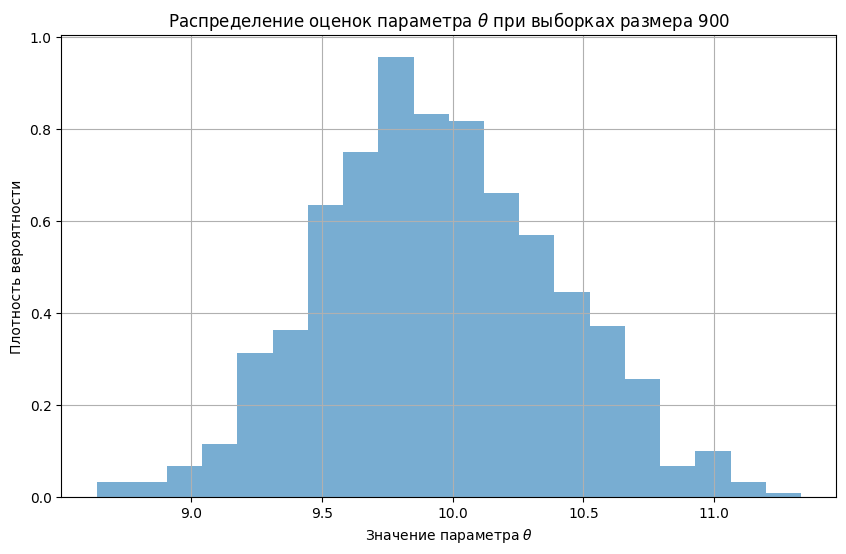

За границей:
[10.91473250857742, 8.525509060715324, 9.028855653071126, 8.95782298760418, 10.919578038168261, 8.981251186022687, 10.895073219698565, 9.071191622350588, 11.10479010183319, 8.892976608651663]
Сдвиги:
[0.40666105848005074, 0.3124328889598509, 0.2821282111862544, 0.1790800674558337, 0.01735799823847728, 0.4108036879318302, 0.09485159903912077, 0.6826731107509456, 0.12831192418835968, 0.10714121805524712]
Дисперсии:
[0.09194011989483632, 0.19798218438401669, 0.2919378959787232, 0.3877100509676547, 0.4871669041428955, 0.5780790372169349, 0.6786909354515988, 0.7912189931606091, 0.8869956814832947, 0.9872346029630773]
Среднеквадратичная ошибка:
[0.16537321648411524, 0.09761431010379851, 0.07959632754715577, 0.032069670559985955, 0.00030130010284698034, 0.16875967001839254, 0.008996825840278137, 0.4660425761423729, 0.016463949888919364, 0.011479240606362013]


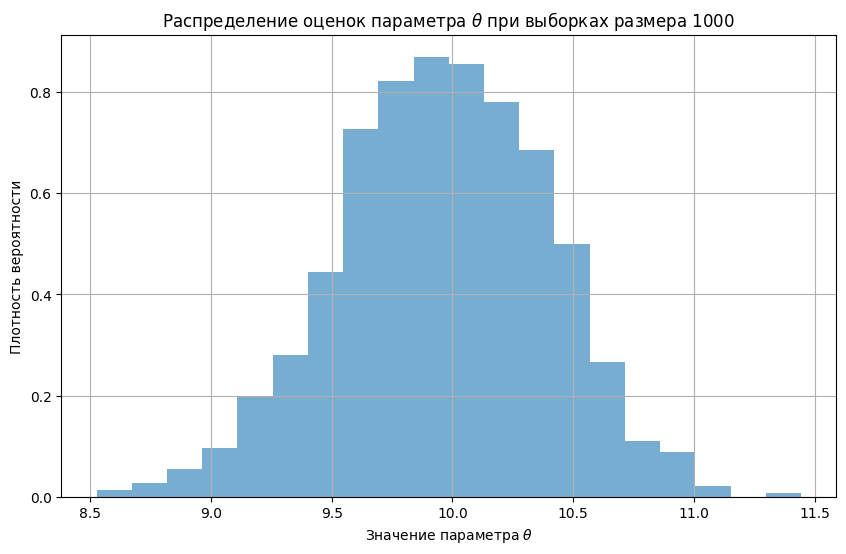

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_theta_distribution(thetas, n):
    plt.figure(figsize=(10, 6))
    plt.hist(thetas, bins=20, density=True, alpha=0.6)
    plt.xlabel('Значение параметра $\\theta$')
    plt.ylabel('Плотность вероятности')
    plt.title(f'Распределение оценок параметра $\\theta$ при выборках размера {n}')
    plt.grid(True)
    plt.show()

def grade(samples, n):
    thetas, bias, vars, mses = [0] * n, [0] * n, [0] * n, [0] * n
    for i in range(n):
        thetas[i] = (np.sqrt(3*np.var(samples[i])))
        bias[i] = abs(thetas[i] - 10)
        vars[i] = np.var(thetas)
        mses[i] = np.mean((thetas[i]-10)**2)
    return thetas, bias, vars, mses


for n in range(100, 1001, 100):
    samples = np.random.uniform(low=-10, high=10, size=(n, 100))
    thetas, bias, vars, mses = grade(samples, n)
    out_of_range = []    
    for i in thetas:
        if np.abs(np.abs(i) - 10)>0.88:
            out_of_range.append(i)
    print("За границей:")
    print (out_of_range[:10])
    print("Сдвиги:")
    print (bias[:10])
    print("Дисперсии:")
    print (vars[:10])
    print("Среднеквадратичная ошибка:")
    print (mses[:10])    
    plot_theta_distribution(thetas, n)
    


## TASK 2

In [11]:
mu_prior = 0
sigma_prior = 1

data_samples = np.random.normal(loc=10, scale=1, size=100)

def prior(theta):
    return norm.pdf(theta, loc=mu_prior, scale=sigma_prior)

def likelihood(theta, data):
    return np.prod(norm.pdf(data, loc=theta, scale=1))

def posterior(theta, data):
    return prior(theta) * likelihood(theta, data)

def normalize_posterior(theta_range, data):
    unnormalized_posterior = [posterior(theta, data) for theta in theta_range]
    normalization_constant = np.trapz(unnormalized_posterior, theta_range)
    normalized_posterior = unnormalized_posterior / normalization_constant
    return normalized_posterior

def bayesian_estimate(theta_range, posterior):
    return np.trapz(theta_range * posterior, theta_range)

theta_range = np.linspace(-10, 10, 1000)

normalized_posterior = normalize_posterior(theta_range, data_samples)

bayesian_theta_estimate = bayesian_estimate(theta_range, normalized_posterior)
print("Байесовская оценка параметра theta:", bayesian_theta_estimate)


Байесовская оценка параметра theta: 9.921814415386194
